# Plotting

## Basics
There are a few different ways to plot in Julia (including calling PyPlot). <br>

Here we'll show you how to use `Plots.jl`.  If it's not installed yet, you need to use the package manager to install it, and Julia will precompile it for you the first time you use it:

In [1]:
# using Pkg
# Pkg.add("Plots")
using Plots

┌ Info: Recompiling stale cache file C:\Users\Z001C9V\.julia\compiled\v1.0\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


One of the advantages to `Plots.jl` is that it allows you to seamlessly change backends. In this notebook, we'll try out the `gr()`, `pyplot()`, and `unicodeplots()` backends.<br>

In the name of scientific inquiry, let's use this notebook to examine the relationship between the global temperature and the number of pirates between roughly 1860 and 2000.

In [2]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17];

Plots supports multiple backends — that is, libraries that actually do the drawing — all with the same API. To start out, let's try the GR backend.  You choose it with a call to `gr()`:

In [3]:
gr()

Plots.GRBackend()

and now we can use commands like `plot` and `scatter` to generate plots.

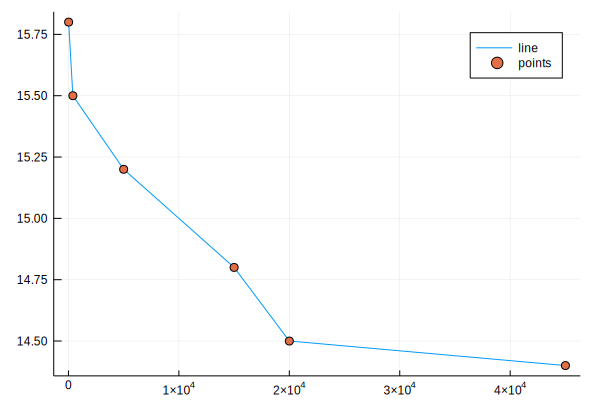

In [4]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") # ! mutates the last plot created.

The `!` at the end of the `scatter!` function name makes `scatter!` a mutating function, indicating that the scattered points will be added onto the pre-existing plot.

In contrast, see what happens when you replace `scatter!` in the above with the non-mutating function `scatter`.

Next, let's update this plot with the `xlabel!`, `ylabel!`, and `title!` commands to add more information to our plot.

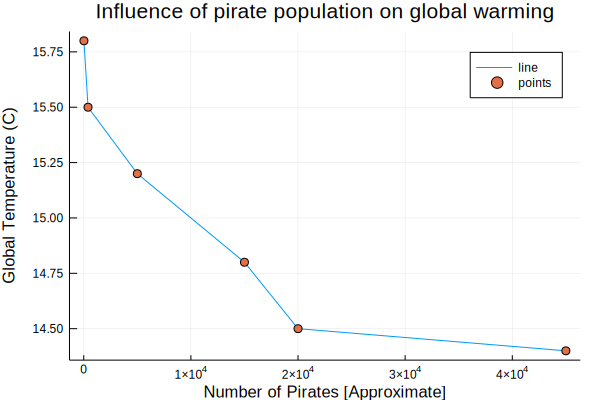

In [5]:
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

This still doesn't look quite right. The number of pirates has decreased since 1860, so reading the plot from left to right is like looking backwards in time rather than forwards. Let's flip the x axis to better see how pirate populations have caused global temperatures to change over time!

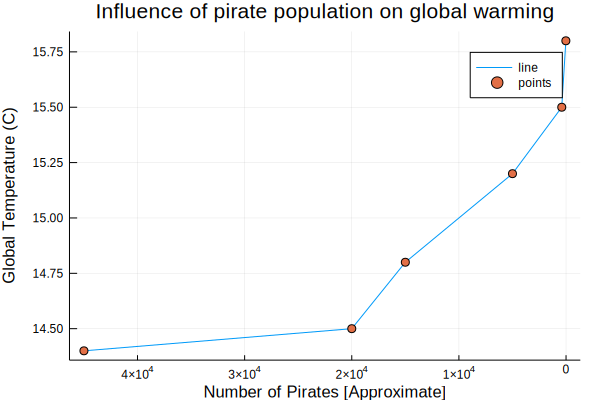

In [6]:
xflip!()

And there we have it!

Note: We've had some confusion about this exercise. :) This is a joke about how people often conflate correlation and causation.

### Changing backends

Without changing syntax, we can create the same plot with various backends

In [18]:
using Pkg
Pkg.add("UnicodePlots")

 Resolving package versions...


Pkg.Types.ResolverError: Unsatisfiable requirements detected for package ASTInterpreter2 [e6d88f4b]:
 ASTInterpreter2 [e6d88f4b] log:
 ├─possible versions are: 0.1.0-0.1.1 or uninstalled
 ├─restricted by compatibility requirements with Atom [c52e3926] to versions: 0.1.0-0.1.1
 │ └─Atom [c52e3926] log:
 │   ├─possible versions are: [0.1.0-0.1.1, 0.2.0-0.2.1, 0.3.0, 0.4.0-0.4.6, 0.5.0-0.5.10, 0.6.0-0.6.17, 0.7.0-0.7.15, 0.8.0-0.8.8] or uninstalled
 │   └─restricted to versions 0.7.11 by an explicit requirement, leaving only versions 0.7.11
 └─restricted by julia compatibility requirements to versions: uninstalled — no versions left

In [11]:
x = [i for i in 1:20]
y = x .^ 2 / 2
;

In [12]:
for backend in [gr, unicodeplots, pyplot]
    backend()
    f = plot(x, y)
    xlabel!("x")
    ylabel!("x^2 / 2")
    title!("x^2 / 2 vs. x")
    display(f)
end

ArgumentError: ArgumentError: Package UnicodePlots not found in current path:
- Run `import Pkg; Pkg.add("UnicodePlots")` to install the UnicodePlots package.


And notice how this second plot differs from the first!  Using text like this is a little silly in a Jupyter notebook where we have fancy drawing capabilities, but it can be very useful for quick and dirty visualization in a terminal.

### LaTeXStrings & annotations

Add pretty math equations and annotations to plots!

In [15]:
Pkg.add(LaTeXStrings)
using LaTeXStrings

 Resolving package versions...


Pkg.Types.ResolverError: Unsatisfiable requirements detected for package ASTInterpreter2 [e6d88f4b]:
 ASTInterpreter2 [e6d88f4b] log:
 ├─possible versions are: 0.1.0-0.1.1 or uninstalled
 ├─restricted by compatibility requirements with Atom [c52e3926] to versions: 0.1.0-0.1.1
 │ └─Atom [c52e3926] log:
 │   ├─possible versions are: [0.1.0-0.1.1, 0.2.0-0.2.1, 0.3.0, 0.4.0-0.4.6, 0.5.0-0.5.10, 0.6.0-0.6.17, 0.7.0-0.7.15, 0.8.0-0.8.8] or uninstalled
 │   └─restricted to versions 0.7.11 by an explicit requirement, leaving only versions 0.7.11
 └─restricted by julia compatibility requirements to versions: uninstalled — no versions left

In [16]:
f = plot(x, y)
xlabel!(L"x")
ylabel!(L"\frac{x^2}{2}")
title!(L"\frac{x^2}{2} \ vs.\ x")

LoadError: UndefVarError: @L_str not defined

In [17]:
annotate!(f, [(10, 50,text(L"So\ exponential!",16,:center))])

LoadError: UndefVarError: @L_str not defined

### Layouts

Arrange subplots within a larger plot using either **grid** or **custom** layouts.

In [ ]:
x = -10:10

In [ ]:
myplots = [plot(x, x.^i) for i in 1:4]
plot(myplots..., layout = (2, 2), legend = false)
# Same as:
# plot(myplots[1], myplots[2], myplots[3], myplots[4], layout = (2, 2), legend = false)

In [ ]:
# mylayout = @layout([a{0.5h};[b{0.7w} c]; d])
mylayout = @layout([a;[b{0.5w} c{0.5w}]; d])
plot(myplots..., layout = mylayout, legend = false)

### Going beyond line and scatter plots

In [ ]:
n = 10000
x = randn(n)
y = randn(n)
histogram2d(x, y,nbins=100,colorbar=true)

In [ ]:
n = 1000
y = hcat(rand(n), randn(n)) # generate 2 random samples of size 1000 each
boxplot(["Uniform" "Normal"], y, leg=false, color=:red)

### Exercises

#### 8.1 
Given
```julia
x = -10:10
```
plot y vs. x for $y = x^2$.  You may want to change backends back again.

In [ ]:
x = -10:10

#### 8.2 
Execute the following code

In [ ]:
x = -10:10
p1 = plot(x, x)
p2 = plot(x, x.^2)
p3 = plot(x, x.^3)
p4 = plot(x, x.^4)

and then create a $4x1$ plot that uses `p1`, `p2`, `p3`, and `p4` as subplots.